## The code following is refered from [morvan's tutorial of pytorch](https://morvanzhou.github.io/tutorials/machine-learning/torch/2-03-activation/)

## 1. Activation Function

In [6]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.linspace(-5,5,200)
x = Variable(x)
# print x

In [7]:
x_np = x.data.numpy()
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

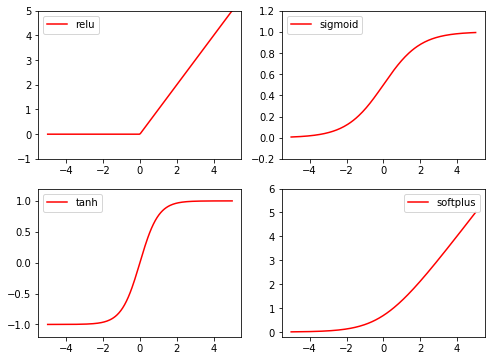

In [11]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## 2. Regression

In [ ]:
%reset
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # insert the dimension which is 1 to certain position to the tensor
y = x.pow(2) + 0.2*torch.rand(x.size())

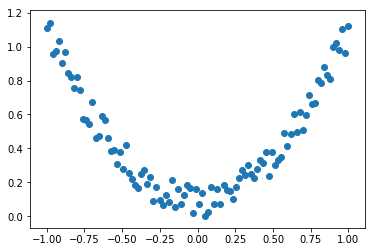

In [22]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 定义 Net

In [34]:
import torch.nn.functional as F
class Net(torch.nn.Module): # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x): 
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)
# 输入层1个，隐藏层十个， 输出层1个
# print(net)

### 开始训练

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # lr是学习率
loss_func = torch.nn.MSELoss() # 均方误差公式

for t in range(100):
    prediction = net(x) # 输出Net的预测值
    loss = loss_func(prediction, y) # 计算误差
    
    optimizer.zero_grad() # 清空上一步残留的更新参数
    loss.backward() # 反向传播
    optimizer.step() # 更新参数到net上
        
    # 可视化结果
    if t % 5 ==0:
        plt.cla() # Clear the current axes.
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) # lw = width
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

## 3. Classification

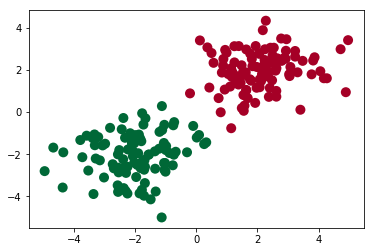

In [52]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100) # 这组数据的label
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

# 合并数据
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) #dimension代表沿什么维连接张量序列
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建立网络

In [61]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

### 训练

In [ ]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值
    
    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), dim=1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

## 4. Fast Build

Let's review the above network:

In [87]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net1 = Net(1, 10, 1)   # 这是我们用这种方式搭建的 net1

The network we mentioned above can be implemented in a faster way:

In [89]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

Let's compare these two networks:

In [90]:
print(net1)

print(net2)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


This means that net2 incorporates ReLU layer into the building.

If we do not need to DIY network, the second way is faster.

## 5. Store the network

In [117]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      

### Restore the whole network

In [124]:
def restore_net():
    # restore the entire net1 to  net2
    net2 = torch.load('./net.pkl')
    prediction = net2(x)
    return prediction

### Restore the network based on parameters

In [125]:
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('./net_params.pkl'))
    prediction = net3(x)
    return prediction

### Show me the result

In [ ]:
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# We have 2 ways to save the network:
torch.save(net1, './net.pkl')  # 保存整个网络
torch.save(net1.state_dict(), './net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)

# 提取整个网络
prediction2 = restore_net()

# 提取网络参数, 复制到新网络
prediction3 = restore_params()

I have no idea why the second saving way does not work in IPython.

In [ ]:
prediction1 = net1(x)

plt.figure(1, figsize=(8, 6))
plt.subplot(131)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction1.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})

plt.subplot(132)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction2.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})

plt.subplot(133)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction3.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})


Ok, at least the first saving way works.